In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
import qiskit.quantum_info as qi

from qiskit import IBMQ
from IBM_Q import API_IBM

IBMQ.save_account(API_IBM, overwrite=True)


IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

provider = IBMQ.get_provider(hub='ibm-q-utokyo')
backend = provider.get_backend('ibmq_montreal')

In [19]:
def initialization(circuit,a):
    # Initialization
    n = circuit.num_qubits
    # For input qubits
    for qubit in range(n-a):
        circuit.h(qubit)
    # For the ancilla bit
    circuit.x(n-1)
    circuit.h(n-1)
    circuit.barrier()

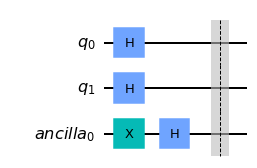

In [3]:
n = 4
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(3, 'ancilla')
initialization_circuit = QuantumCircuit(qr, anc)

initialization(initialization_circuit)
initialization_circuit.draw('mpl')

In [14]:
def oracle(circuit):
    circuit.mct([0,1,2,3],4)
    for i in range(4):
        circuit.x(i)
    circuit.mct([0,1,2,3],5)
    for i in range(4):
        circuit.x(i)
    circuit.x(6)
    circuit.barrier()
    for i in range(4,6):
        circuit.x(i)
    circuit.ccx(4,5,6)
    for i in range(4,6):
        circuit.x(i)
    circuit.barrier()

In [111]:
def diffusion(circuit, a):
    input_qubits = circuit.num_qubits - a
    circuit.h(range(0, input_qubits))
    circuit.x(range(0, input_qubits))
    circuit.h(input_qubits-1)
    circuit.mct([i for i in range(0, input_qubits-1)], input_qubits-1)
    circuit.h(input_qubits-1)
    circuit.x(range(0, input_qubits))
    circuit.h(range(0, input_qubits))
    circuit.barrier()

In [112]:
n = 4
a = 3
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(a, 'ancilla')
c = ClassicalRegister(n)
grover_circuit = QuantumCircuit(qr, anc,c)

In [113]:
# Let's do Grover search
num_iterations = 1
initialization(grover_circuit,a)
for i in range(0, num_iterations):
    oracle(grover_circuit)
    diffusion(grover_circuit, a)

In [114]:
grover_circuit.measure(qr,c)

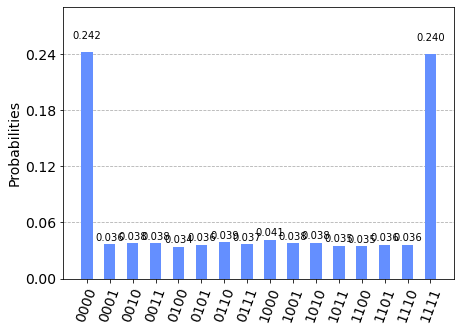

In [115]:
# import basic plot tools
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
shots = 10**4
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)